In [2]:
# module 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

import copy

In [9]:
# dataset 로딩
# x_train_load = pd.read_csv('C://Users//zeus_//Desktop//champion_data//train/train_activity_final_v3.csv').sort_values(by='acc_id', ascending=True)
y_train_load = pd.read_csv('C://Users//zeus_//Desktop//champion_data//train/train_label.csv').sort_values(by='acc_id', ascending=True)
# x_test_load = pd.read_csv('C://Users//zeus_//Desktop//champion_data//test/test_activity_final_v1.csv').sort_values(by='acc_id', ascending=True)

## 중요 피처 뽑는 함수
- input: data_columns, feature_importances, num
- output: list
---

In [11]:
def select_important_feautre(columns, feature_importance, num):
    
    #딕셔너리
    dic = {}
    for value in [list(v) for v in zip(columns, feature_importance)]:
        dic[value[1]] = value[0] 
        
    sorted_list = sorted(dic)
    sorted_list.reverse()
    
    i = 0
    result = []
    for y in sorted_list:
        result.append(dic[y])
        i = i+1
        if(i == num):
            break
    
    return result

In [10]:
# x_data = copy.deepcopy(x_train_load)#.drop(["Unnamed: 0"], axis=1)
y_data = copy.deepcopy(y_train_load.label)
# x_test = copy.deepcopy(x_test_load)

### acc_id 제거

In [81]:
x_data = x_data.drop(['acc_id', 'Unnamed: 0'], axis=1)
# x_test = x_test.drop(['acc_id'], axis=1)

# !!!START!!!
---
---

In [82]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=200)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size = 0.5, random_state=200)

# 랜덤포레스트
---

In [83]:
forest = RandomForestClassifier(n_estimators=100, random_state=25, n_jobs=-1, max_depth=30)

In [84]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [85]:
print(classification_report(y_val, forest.predict(x_val)))

             precision    recall  f1-score   support

     2month       0.67      0.64      0.65      2507
      month       0.68      0.58      0.62      2458
   retained       0.76      0.85      0.80      2502
       week       0.85      0.91      0.88      2533

avg / total       0.74      0.75      0.74     10000



In [86]:
np.mean(f1_score(y_val, forest.predict(x_val), average=None))

0.7399505292781696

In [87]:
print(classification_report(y_test, forest.predict(x_test)))

             precision    recall  f1-score   support

     2month       0.64      0.64      0.64      2508
      month       0.66      0.56      0.60      2470
   retained       0.77      0.84      0.80      2539
       week       0.84      0.89      0.87      2483

avg / total       0.73      0.73      0.73     10000



In [88]:
np.mean(f1_score(y_test, forest.predict(x_test), average=None))

0.726737484168746

In [ ]:
x_data = x_data.loc[:,select_important_feautre(x_data.columns, forest.feature_importances_, 200)]

In [ ]:
select_important_feautre(x_data.columns, forest.feature_importances_, 200)

# MODEL 1

In [89]:
y_data_layer1 = y_train.map(lambda value: "MON" if value == "month" or value == "2month" else value)

In [90]:
x_train_layer1, x_test_layer1, y_train_layer1, y_test_layer1 = train_test_split(x_train, y_data_layer1, test_size=0, random_state=1)

In [91]:
forest1 = RandomForestClassifier(n_estimators=100, random_state=25, n_jobs=-1, max_depth=30, criterion='entropy')

In [92]:
forest1.fit(x_train_layer1, y_train_layer1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [93]:
print("테스트 세트 정확도: {:.3f}".format(forest1.score(x_val, y_val.map(lambda value: "MON" if value == "month" or value == "2month" else value))))

테스트 세트 정확도: 0.858


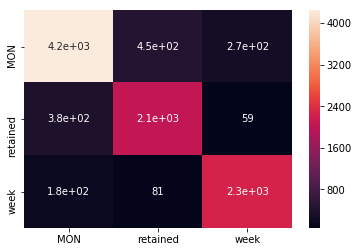

In [96]:
cm = pd.DataFrame(confusion_matrix(y_val.map(lambda value: "MON" if value == "month" or value == "2month" else value), forest1.predict(x_val)), columns=forest1.classes_, index=forest1.classes_)
sns.heatmap(cm, annot=True)

In [97]:
print(classification_report(y_val.map(lambda value: "MON" if value == "month" or value == "2month" else value), forest1.predict(x_val)))

             precision    recall  f1-score   support

        MON       0.88      0.85      0.87      4965
   retained       0.79      0.83      0.81      2502
       week       0.87      0.90      0.89      2533

avg / total       0.86      0.86      0.86     10000



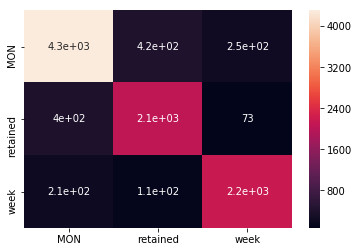

In [98]:
cm = pd.DataFrame(confusion_matrix(y_test.map(lambda value: "MON" if value == "month" or value == "2month" else value), forest1.predict(x_test)), columns=forest1.classes_, index=forest1.classes_)
sns.heatmap(cm, annot=True)

In [99]:
print(classification_report(y_test.map(lambda value: "MON" if value == "month" or value == "2month" else value), forest1.predict(x_test)))

             precision    recall  f1-score   support

        MON       0.88      0.87      0.87      4978
   retained       0.80      0.81      0.81      2539
       week       0.87      0.87      0.87      2483

avg / total       0.85      0.85      0.85     10000



# MODEL 2

In [42]:
x_data = pd.read_csv('C://Users//zeus_//Desktop//champion_data/mon2mon/feature148_train.csv').sort_values(by='acc_id', ascending=True)

In [43]:
x_data = x_data.drop(['acc_id', 'Unnamed: 0'],axis=1)

In [26]:
x_data = x_data.fillna(-99)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
mmscaler = MinMaxScaler()

In [116]:
mmscaler.fit(x_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [117]:
mmscaler.transform(x_data).shape

(100000, 3148)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(mmscaler.transform(x_data), y_data, test_size=0.2, random_state=200)

In [119]:
custom_filter = [v[0] or v[1] for v in zip(list((y_train == 'month').values), list((y_train == '2month').values))]
x_data_layer2 = x_train[custom_filter]
y_data_layer2 = y_train[custom_filter]

In [120]:
x_train_layer2, x_test_layer2, y_train_layer2, y_test_layer2 = train_test_split(x_data_layer2, y_data_layer2, test_size=0.1, random_state=1)

In [121]:
forest2 = RandomForestClassifier(n_estimators=100, random_state=25, n_jobs=-1, max_depth=30)

In [122]:
forest2.fit(x_train_layer2, y_train_layer2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [57]:
custom_filter2 = [v[0] or v[1] for v in zip(list((y_val == 'month').values), list((y_val == '2month').values))]

NameError: name 'y_val' is not defined

In [123]:
print("테스트 세트 정확도: {:.3f}".format(forest2.score(x_val[custom_filter2], y_val[custom_filter2])))

NameError: name 'x_val' is not defined

In [125]:
print("테스트 세트 정확도: {:.3f}".format(forest2.score(x_test_layer2, y_test_layer2)))

테스트 세트 정확도: 0.698


In [126]:
cm = pd.DataFrame(confusion_matrix(y_val[custom_filter2], forest2.predict(x_val[custom_filter2])), columns=forest2.classes_, index=forest2.classes_)
sns.heatmap(cm, annot=True)

NameError: name 'y_val' is not defined

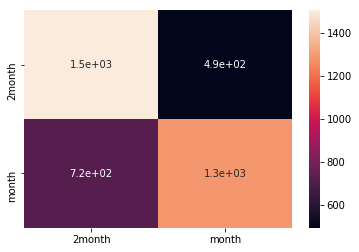

In [127]:
cm = pd.DataFrame(confusion_matrix(y_test_layer2, forest2.predict(x_test_layer2)), columns=forest2.classes_, index=forest2.classes_)
sns.heatmap(cm, annot=True)

In [128]:
print(classification_report(y_test_layer2, forest2.predict(x_test_layer2)))

             precision    recall  f1-score   support

     2month       0.68      0.75      0.71      1997
      month       0.72      0.64      0.68      2009

avg / total       0.70      0.70      0.70      4006



In [65]:
from sklearn.tree import DecisionTreeClassifier
import random

In [160]:
tree = DecisionTreeClassifier(max_depth=16, random_state=random.randrange(1,100), min_samples_split=20)

In [161]:
tree.fit(x_train_layer2, y_train_layer2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3,
            splitter='best')

In [162]:
print("테스트 세트 정확도: {:.3f}".format(tree.score(x_train_layer2, y_train_layer2)))

테스트 세트 정확도: 0.776


In [163]:
print("테스트 세트 정확도: {:.3f}".format(tree.score(x_test_layer2, y_test_layer2)))

테스트 세트 정확도: 0.689


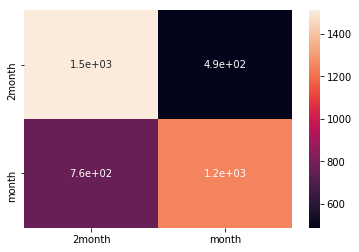

In [155]:
cm = pd.DataFrame(confusion_matrix(y_test_layer2, tree.predict(x_test_layer2)), columns=tree.classes_, index=tree.classes_)
sns.heatmap(cm, annot=True)

In [135]:
print(classification_report(y_test_layer2, tree.predict(x_test_layer2)))

             precision    recall  f1-score   support

     2month       0.66      0.75      0.70      1997
      month       0.72      0.62      0.66      2009

avg / total       0.69      0.69      0.68      4006



In [137]:
select_important_feautre(columns=x_data.columns, feature_importance=tree.feature_importances_, num=100)

['newnew_sum_40',
 'newnew_minus_578',
 'newnew_sum_121',
 'newnew_minus_127',
 'sub_whisper_chat_178-123456',
 'sub_item_hongmun_178-123456',
 'sub_play_time_15678-1234',
 'sub_play_time_1678-12345',
 'newnew_sum_616',
 'sub_party_chat_15678-1234',
 'sub_play_time_18-123456',
 'newnew_minus_108',
 'newnew_minus_186',
 'newnew_sum_108',
 'sub_cnt_dt_1678-12345',
 'newnew_sum_37',
 'newnew_sum_79',
 'newnew_minus_425',
 'sub_cnt_clear_inzone_solo_1678-12345',
 'newnew_sum_803',
 'newnew_sum_71',
 'newnew_minus_197',
 'newnew_minus_145',
 'sub_cnt_dt_15678-1234',
 'newnew_multi_186',
 'newnew_sum_186',
 'newnew_multi_387',
 'newnew_minus_311',
 'sub_cnt_dt_18-123456',
 'newnew_sum_694',
 'newnew_minus_217',
 'newnew_minus_104',
 'newnew_minus_131',
 'newnew_minus_808',
 'newnew_minus_600',
 'newnew_minus_142',
 'newnew_sum_867',
 'newnew_sum_808',
 'newnew_minus_264',
 'sub_item_hongmun_18-123456',
 'newnew_minus_201',
 'newnew_sum_311',
 'newnew_sum_854',
 'newnew_sum_43',
 'newnew_sum_

In [247]:
x_train_layer2 = x_train_layer2.drop(['g_to_p_8'], axis=1)

In [248]:
x_val = x_val.drop(['g_to_p_8'], axis=1)

In [609]:
x_data.shape

(100000, 4580)

In [113]:
for i in range(1000):
    temp = x_data.loc[:,random.sample(list(x_data.columns), 2)]
    x_data['newnew_sum_' + str(i)] = temp.iloc[:,0] + temp.iloc[:,1]
    x_data['newnew_minus_' + str(i)] = temp.iloc[:,0] - temp.iloc[:,1]
    x_data['newnew_multi_' + str(i)] = temp.iloc[:,0] * temp.iloc[:,1]
#     x_data['newnew_divide_' + str(i)] = temp.iloc[:,0] / (temp.iloc[:,1] + 0.000000001)
